In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import preprocessing, linear_model, svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold

In [2]:
crime_data = pd.read_csv('../new_data/zip_crime_data.csv')

In [3]:
def splitToTrainTest(dataframe, trainPercent):
    recordNum = dataframe.shape[0]
    shuffledIndex = np.random.permutation(np.arange(recordNum))
    trainSetNum = int(recordNum * trainPercent)
    trainDf, testDf = dataframe.iloc[shuffledIndex[:trainSetNum]], dataframe.iloc[shuffledIndex[trainSetNum:]]
    return trainDf, testDf
train_df, test_df = splitToTrainTest(crime_data, 0.8)

In [4]:
# ['LEVEL_FELONY','LEVEL_MISDEMEANOR', 'LEVEL_VIOLATION']
clf = DecisionTreeClassifier(criterion='entropy')
irrelevant_labels = ['LEVEL_FELONY','LEVEL_MISDEMEANOR', 'LEVEL_VIOLATION', 'zipcode', 'time', 'date']
y_labels = ['LEVEL_FELONY','LEVEL_MISDEMEANOR', 'LEVEL_VIOLATION'][2]
clf.fit(train_df.drop(irrelevant_labels, axis='columns'), train_df[y_labels])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Text(0,0.5,'Normalized Gini Importance')

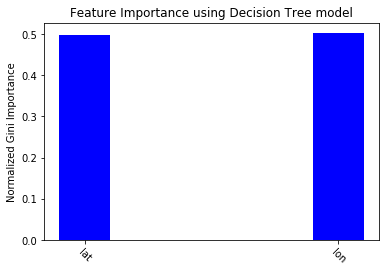

In [5]:
new_df = pd.DataFrame({'importance':clf.feature_importances_, 'feature':train_df.drop(irrelevant_labels, 1).columns.values})
new_df.sort_values('importance', axis = 0, inplace = True)
fig, ax = plt.subplots()
ax.bar(np.arange(len(new_df['importance'].values)), new_df['importance'].values, width = 0.2, color='b')
ax.set_xticks(np.arange(len(new_df['importance'].values)))
ax.set_xticklabels(new_df['feature'].values, rotation=-45)
plt.title('Feature Importance using Decision Tree model')
ax.set_ylabel('Normalized Gini Importance')

In [6]:
train_df[['LEVEL_FELONY','LEVEL_MISDEMEANOR', 'LEVEL_VIOLATION', 'lat', 'lon']].corr()

,LEVEL_FELONY,LEVEL_MISDEMEANOR,LEVEL_VIOLATION,lat,lon
LEVEL_FELONY,1.000000,-0.731206,-0.271224,-0.017067,0.028821
LEVEL_MISDEMEANOR,-0.731206,1.000000,-0.458266,0.029161,-0.028497
LEVEL_VIOLATION,-0.271224,-0.458266,1.000000,-0.018908,0.002658
lat,-0.017067,0.029161,-0.018908,1.000000,0.315347
lon,0.028821,-0.028497,0.002658,0.315347,1.000000


In [7]:
train_predict = clf.predict(train_df.drop(irrelevant_labels, axis=1))
test_predict = clf.predict(test_df.drop(irrelevant_labels, axis=1))
train_accuracy = metrics.accuracy_score(train_predict, train_df[y_labels])
test_accuracy = metrics.accuracy_score(test_predict, test_df[y_labels])

print('Train accuracy = {}\nTest accuracy = {}'.format(train_accuracy, test_accuracy))

Train accuracy = 0.8738194318798624
Test accuracy = 0.8379458082445577


In [8]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import norm, pareto, kstest
from statsmodels.graphics.gofplots import qqplot

/Users/shuo.jiang/anaconda/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


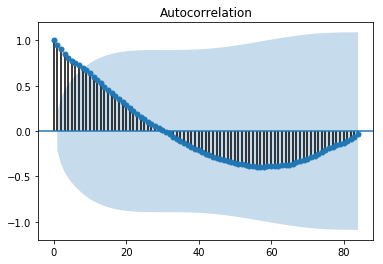

array([ 1.        ,  0.95353866,  0.90045873,  0.84726381,  0.8026084 ,
        0.76987771,  0.74559496,  0.72366806,  0.70011739,  0.67174841,
        0.63732548,  0.60043744,  0.56405908,  0.52682741,  0.49062231,
        0.4564486 ,  0.42303217,  0.38914319,  0.35322523,  0.31683842,
        0.28347093,  0.25305055,  0.22321957,  0.1927418 ,  0.16072935,
        0.12920532,  0.10111681,  0.07569018,  0.05183894,  0.02973386,
        0.00857153, -0.01362404, -0.03715996, -0.06120699, -0.08585428,
       -0.111176  , -0.13517673, -0.1562431 , -0.17476681, -0.19211165,
       -0.20967342])

In [9]:
timeSeries = pd.read_csv("../new_data/ny_house_sell.csv", header=0).iloc[0][1:]
plot_acf(timeSeries)
plt.show()
acf(timeSeries)

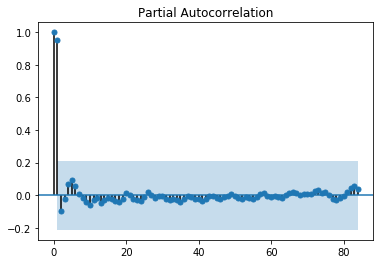

array([ 1.        ,  0.96489032, -0.12838412, -0.0276443 ,  0.09509658,
        0.13063861,  0.07663472,  0.00767434, -0.01733093, -0.04984013,
       -0.07726785, -0.04006544, -0.0252434 , -0.08259538, -0.05411765,
       -0.0267014 , -0.04392597, -0.06030028, -0.07947537, -0.04249004,
        0.01585872, -0.00340141, -0.05179861, -0.06052495, -0.06341171,
       -0.01622468,  0.03233971, -0.00738271, -0.0362032 , -0.01359136,
       -0.00735557, -0.04835328, -0.06656032, -0.05792679, -0.08077198,
       -0.10960475, -0.07201057, -0.04375066, -0.06993196, -0.09371774,
       -0.10277921])

In [10]:
plot_pacf(timeSeries)
plt.show()
pacf(timeSeries)

In [11]:
durbin_watson(timeSeries)

0.00020752741518038784

In [12]:
def plotROC(classifiers, classifier_names, X_train, y_train, X_test, y_test):
    plt.figure()
    for classifier, classifier_name in zip(classifiers, classifier_names):
        # Learn to predict
        y_score = classifier.fit(X_train, y_train).decision_function(X_test)

        # Compute ROC curve and ROC area
        fpr, tpr, threshold = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
    
        # Plot
        lw = 2
        rand_color = np.random.rand(3,)
        plt.plot(fpr, tpr, c=rand_color,
                 lw=lw, label='%s ROC curve (area = %0.2f)' % (classifier_name, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

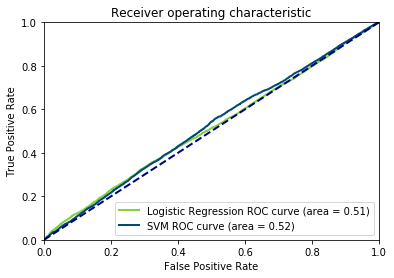

In [14]:
# build model

# logistic regression model
logistic_regression_model = linear_model.LogisticRegression(C = 1e30)

# svm model
svm_model = svm.SVC(kernel = 'linear')

# plot roc curve for logistic regression model and svm model
plotROC([logistic_regression_model, svm_model], ['Logistic Regression', 'SVM'],\
        train_df.drop(irrelevant_labels, axis=1), train_df[y_labels], test_df.drop(irrelevant_labels, axis=1), test_df[[y_labels]])